In [1]:
import pandas as pd

df = pd.read_csv('Cleaned_OnlineRetail.csv')

In [2]:
df.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000,392692.000000
mean,560590.875047,13.119702,3.125914,15287.843865
std,13087.063759,180.492832,22.241836,1713.539549
min,536365.000000,1.000000,0.001000,12346.000000
25%,549234.000000,2.000000,1.250000,13955.000000
50%,561874.000000,6.000000,1.950000,15150.000000
75%,572061.000000,12.000000,3.750000,16791.000000
max,581587.000000,80995.000000,8142.750000,18287.000000


In [4]:
df.skew(numeric_only=True)

InvoiceNo      -0.175439
Quantity      407.345663
UnitPrice     202.740861
CustomerID      0.030148
dtype: float64

In [7]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearMonth,InvoiceDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12-01
...,...,...,...,...,...,...,...,...,...,...
392687,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12,2011-12-09
392688,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12,2011-12-09
392689,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12,2011-12-09
392690,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12,2011-12-09


<Axes: title={'center': 'Top 10 Countries by Number of Transactions'}, xlabel='Country'>

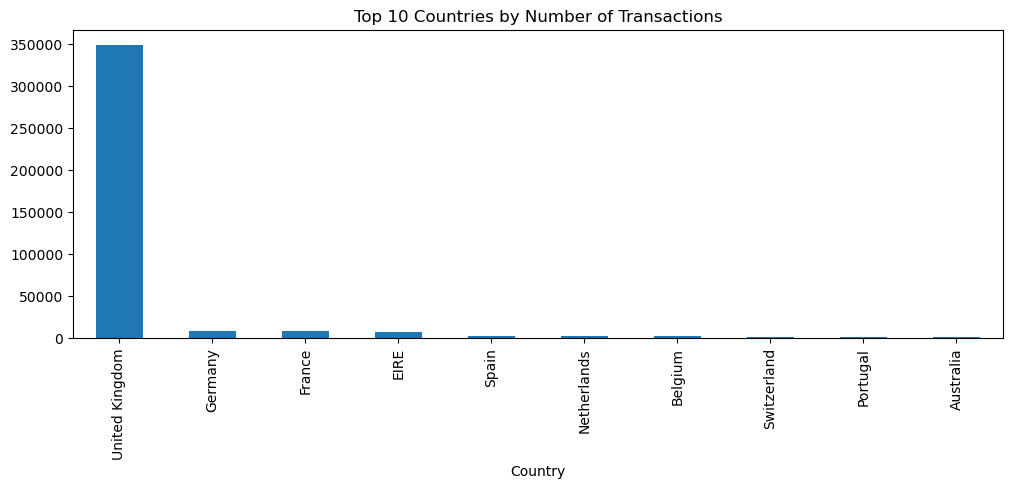

In [9]:
df['Country'].value_counts().head(10).plot(kind='bar', figsize=(12,4), title='Top 10 Countries by Number of Transactions')

<Axes: title={'center': 'Top 10 Countries by Number of Transactions (Excluding: UK)'}, xlabel='Country'>

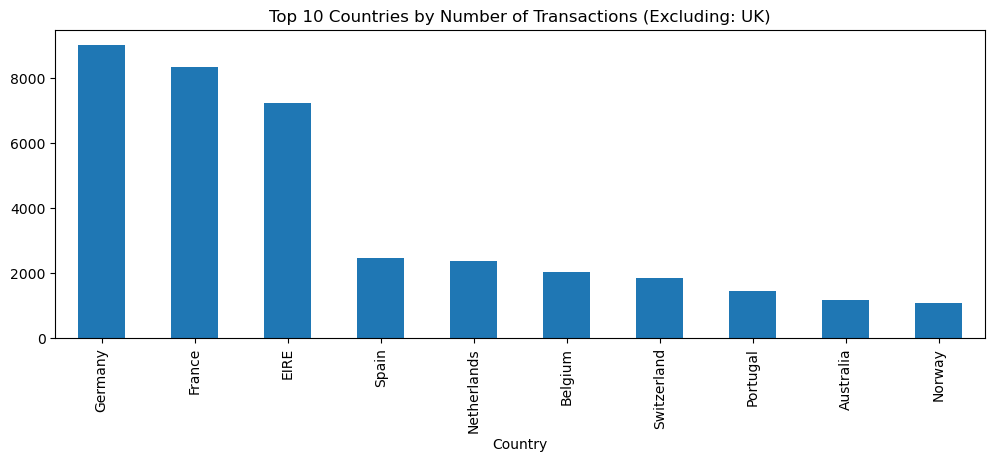

In [10]:
df['Country'].value_counts().drop('United Kingdom').head(10).plot(kind='bar', figsize=(12,4), title='Top 10 Countries by Number of Transactions (Excluding: UK)')

In [12]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [ ]:
top_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

In [16]:
top_products

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142264.75
WHITE HANGING HEART T-LIGHT HOLDER    100392.10
JUMBO BAG RED RETROSPOT                85040.54
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68785.23
ASSORTED COLOUR BIRD ORNAMENT          56413.03
Manual                                 53419.93
RABBIT NIGHT LIGHT                     51251.24
Name: TotalPrice, dtype: float64

<Axes: title={'center': 'Top 10 Products by Total Sales'}, ylabel='Description'>

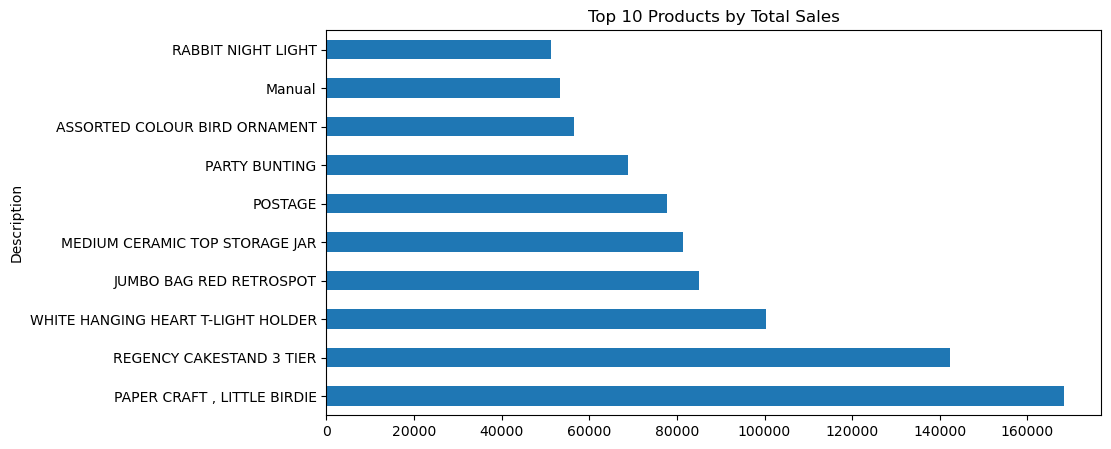

In [15]:
top_products.plot(kind='barh', figsize=(10,5), title='Top 10 Products by Total Sales')

<Axes: >

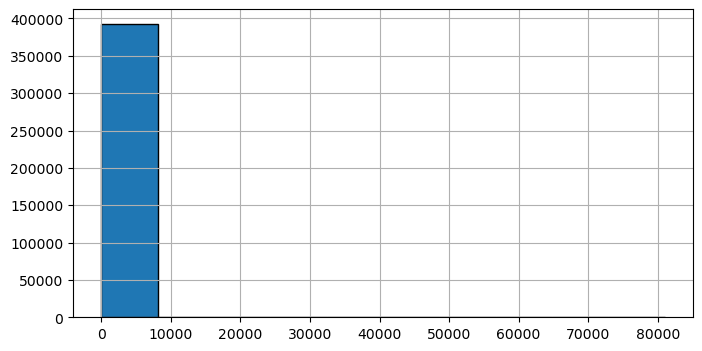

In [20]:
#Quantity Distribution
df['Quantity'].hist(bins=10, figsize=(8,4), edgecolor='black')

<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='YearMonth'>

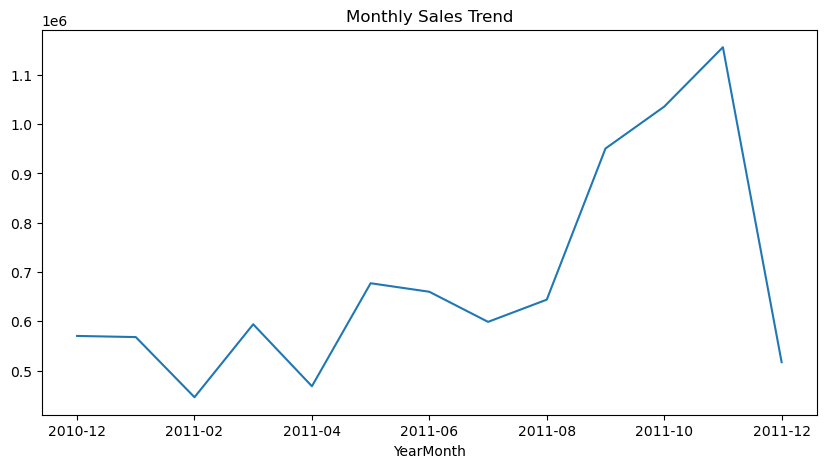

In [21]:
#Total sales over time
df.groupby('YearMonth')['TotalPrice'].sum().plot(kind='line', figsize=(10,5), title='Monthly Sales Trend')

Text(0.5, 1.0, 'Correlation Heatmap')

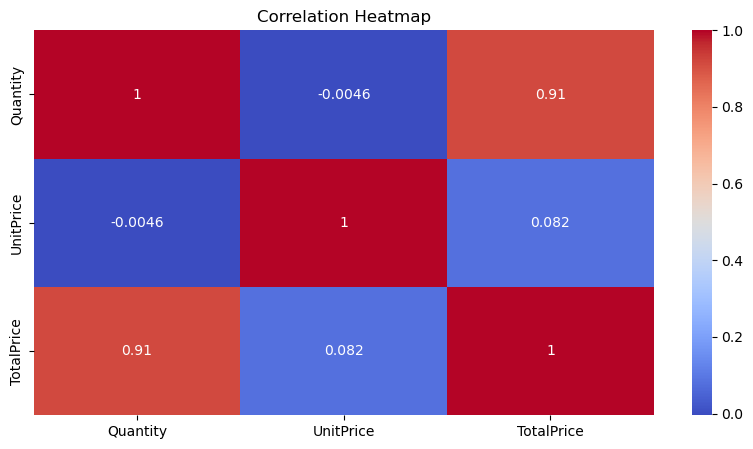

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df[['Quantity', 'UnitPrice', 'TotalPrice']].corr()

plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")

<Axes: title={'center': 'Quantity vs. Unit Price'}, xlabel='Quantity', ylabel='UnitPrice'>

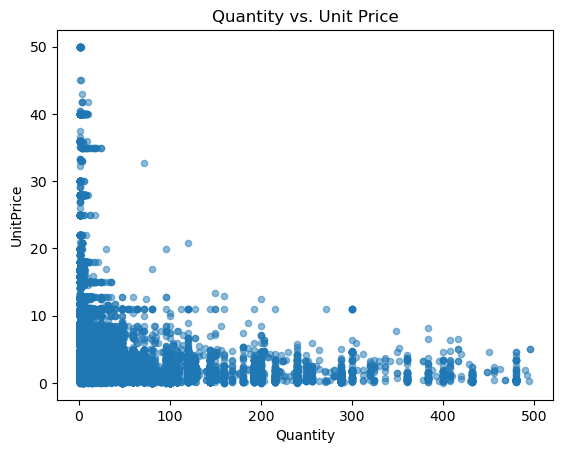

In [23]:
df_filtered = df[(df['Quantity'] < 500) & (df['UnitPrice'] < 50)]
df_filtered.plot.scatter(x='Quantity', y='UnitPrice', alpha=0.5, title='Quantity vs. Unit Price')

<Axes: title={'center': 'Total Sales by Country'}, xlabel='Country'>

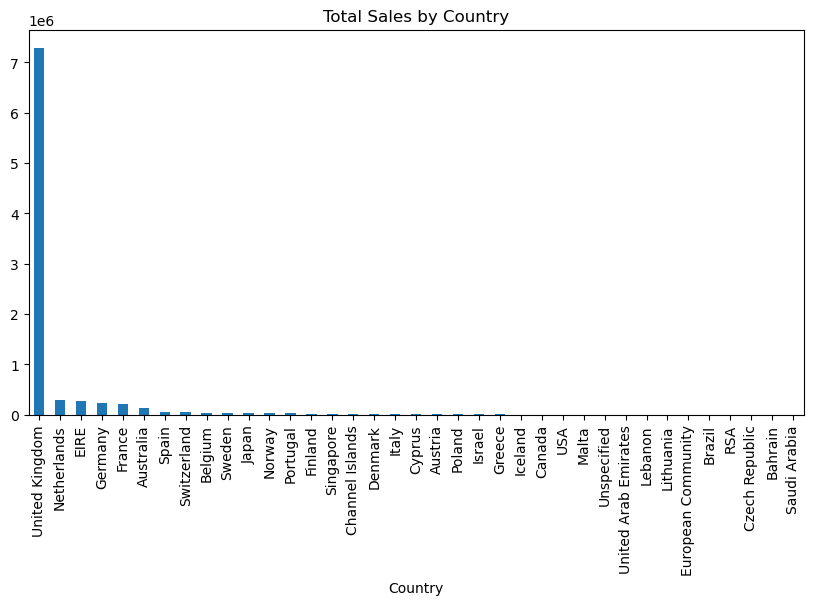

In [24]:
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
country_sales.plot(kind='bar', figsize=(10,5), title='Total Sales by Country')

In [28]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

<Axes: title={'center': 'Total Sales by Day of Week'}, xlabel='DayOfWeek'>

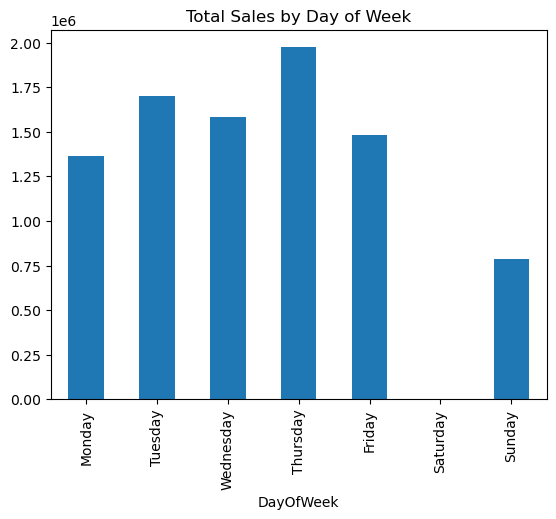

In [30]:
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df.groupby('DayOfWeek')['TotalPrice'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]).plot(kind='bar', title='Total Sales by Day of Week')

In [33]:
df['DayOfWeek'].unique()

array(['Wednesday', 'Thursday', 'Friday', 'Sunday', 'Monday', 'Tuesday'],
      dtype=object)